# Interactive Correlation Analysis Demo

This notebook lets you explore Pearson’s correlation interactively by selecting any two numeric variables from the Iris dataset.

**What you’ll learn:**

- What Pearson’s *r* measures and when to use it  
- How to compute *r* and its *p*-value in Python  
- How to build an interactive widget so that scatterplots and correlation update on‑the‑fly  


In [5]:
# Cell 1: Imports and Data Loading
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import ipywidgets as widgets
from sklearn.datasets import load_iris

# Load Iris into a DataFrame
iris = load_iris()
feature_names = [name.replace(" (cm)","").replace(" ","_") for name in iris.feature_names]
df = pd.DataFrame(iris.data, columns=feature_names)

# Display first few rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Inspect Numeric Columns

We’ll let you choose any two of these numeric columns for correlation.


In [6]:
# Cell 2: Identify numeric columns and show them
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("Numeric columns available:", numeric_cols)


Numeric columns available: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


## Create Interactive Controls

Use two dropdowns to pick X and Y, and automatically update plot + correlation.


In [7]:
# Cell 3: Build the interactive dropdowns
# Dropdown widgets
dropdown_x = widgets.Dropdown(
    options=numeric_cols,
    value=numeric_cols[0],
    description='X variable:',
)

dropdown_y = widgets.Dropdown(
    options=numeric_cols,
    value=numeric_cols[1],
    description='Y variable:',
)


## Update Function

Defines how to redraw the scatterplot and recompute Pearson’s r when selections change.


In [8]:
# Cell 4: Define the update function
def update_correlation(x, y):
    """
    Plot a scatter of df[x] vs df[y] and print Pearson r and p-value.
    """
    plt.figure(figsize=(6, 4))
    plt.scatter(df[x], df[y], alpha=0.7)
    plt.xlabel(x.replace("_"," ").title())
    plt.ylabel(y.replace("_"," ").title())
    plt.title(f"{x.replace('_',' ').title()} vs {y.replace('_',' ').title()}")
    plt.grid(True)
    plt.show()
    
    # Compute Pearson's r and p-value
    r, p = pearsonr(df[x], df[y])
    print(f"Pearson correlation (r) = {r:.3f}")
    print(f"P-value                = {p:.3e}")


## Link Widgets to Output

Use `interactive_output` so that changing either dropdown reruns `update_correlation`.


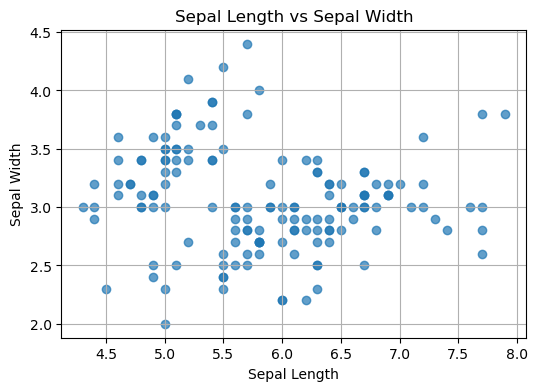

Pearson correlation (r) = -0.118
P-value                = 1.519e-01


In [9]:
# Cell 5: Wire it all together
out = widgets.interactive_output(update_correlation, {
    'x': dropdown_x,
    'y': dropdown_y
})

# Display controls and output
display(widgets.VBox([
    widgets.HBox([dropdown_x, dropdown_y]),
    out
]))


## How to Use

1. Select any two variables from the **X variable** and **Y variable** dropdowns.  
2. The scatterplot and Pearson correlation (with *p*-value) will update automatically.  
3. Experiment with different combinations to see how *r* changes with the data.  

*Note:* Make sure you’ve enabled the `ipywidgets` extension in JupyterLab:
```bash
jupyter labextension install @jupyter-widgets/jupyterlab-manager
